# Project: Wrangle and Analyze data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#ds">Data Storing</a></li>
<li><a href="#da">Data Analysis</a></li>
<li><a href="#ins">Insights</a></li>
</ul>

<a id='intro'></a>
## Introduction
**Goal:** As a part of Udacity's Data Ananlyst Nanodegree program, I had to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

**Data**

1) **The WeRateDogs Twitter archive** contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced."

2) **Image Predictions file** a table full of image predictions (the top three only) using neural networks alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

3) **JSON file with tweets** includes retweet count and favorite count. Using the tweet IDs in the WeRateDogs Twitter archive, I queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file.

<a id='gathering'></a>
## Data Gathering

This section contains uploading The WeRateDogs Twitter archive, downloading Image Predictions and querying the Twitter API for each tweet's JSON data using Python's Tweepy library and storing each tweet's entire set of JSON data in a file called tweet_json.txt file

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

### Twitter archive

In [2]:
# Downloading The WeRateDogs Twitter archive
df_twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twt_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tweet image predictions

In [4]:
# Download the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#  HTTP status code 200 indicates the request has succeeded 
images = url.split('/')[-1]

with open(os.path.join('./', images), mode = 'wb') as file:
    file.write(response.content)

In [6]:
ls *.tsv

image-predictions.tsv


In [7]:
# Reading image predictions file into a DataFrame
df_predictions = pd.read_csv(images, sep = '\\t', engine = 'python')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


###  Tweet's JSON data

In [368]:
CONSUMER_KEY = 'HIDDEN'
CONSUMER_SECRET = 'HIDDEN'
OAUTH_TOKEN = 'HIDDEN'
OAUTH_TOKEN_SECRET = 'HIDDEN'

In [26]:
# Create the Twitter API object and set rate limit params
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [27]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_twt_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

Rate limit reached. Sleeping for: 608


TweepError for id:  758740312047005698
TweepError for id:  754011816964026368
loop # 1000
loop # 1100
loop # 1200
loop # 1300
loop # 1400
loop # 1500
loop # 1600
loop # 1700
TweepError for id:  680055455951884288
loop # 1800


Rate limit reached. Sleeping for: 585


TweepError for id:  676957860086095872
loop # 1900
loop # 2000
loop # 2100
loop # 2200
loop # 2300

Time elapsed (HH:MM:SS):  00:33:38

Number of TweepErrors:  27

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': '

### Save JSON data to a file

In [28]:
# Saving the JSON data in the list to the output file
tweet_file = 'tweet_json.txt'

with open(tweet_file, 'w') as outfile:
    for tweet in tweet_list:
        json.dump(tweet, outfile)
        outfile.write('\n')

### Extracting data from tweet_json.txt and converting it to a DataFrame

In [29]:
# Reading JSON file and saving the information into a DataFrame
twt_json_data = []

with open(tweet_file, 'r') as json_file:
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # Extracting variables
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # Creating a dictionary
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        twt_json_data.append(json_data)

        # Reading the next line of the file
        line = json_file.readline()
        # ----- while -----

# Converting the data to a DataFrame
df_twt_data = pd.DataFrame(twt_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_twt_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7755,36453
1,892177421306343426,5746,31410
2,891815181378084864,3801,23665
3,891689557279858688,7910,39771
4,891327558926688256,8545,37975


In [30]:
df_twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id          2329 non-null int64
retweet_count     2329 non-null int64
favorite_count    2329 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [518]:
#Saving data to csv
df_twt_data.to_csv('tweet_data_extracted.csv')

<a id='assessing'></a>
## Assessing Data
In this section the data was assessed both visually and programmatically for quality and tidiness issues. 

Key point to consider:
* Only tweets with original ratings with images, no retweets, be retained.
* The analysis requires at least eight (8) quality issues and two (2) tidiness issues.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

#### Twitter archive data

In [34]:
# Having a look at the Twitter archive
df_twt_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [35]:
df_twt_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [36]:
df_twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* timestamp is in string format

In [37]:
# Checking NULL values
df_twt_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [38]:
df_twt_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

* There are 23 cases, where the rating denominater != 10

In [39]:
df_twt_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

* Many cases with rating numerator < 10
* Multiple cases, where rating numerator >> 10

In [40]:
df_twt_archive.name.value_counts().head(40)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Bo           9
Winston      9
Sadie        8
the          8
Toby         7
an           7
Bailey       7
Buddy        7
Daisy        7
Bella        6
Oscar        6
Dave         6
Jax          6
Scout        6
Jack         6
Milo         6
Leo          6
Rusty        6
Stanley      6
Koda         6
Phil         5
Louis        5
Sunny        5
Gus          5
Bentley      5
Alfie        5
George       5
very         5
Oakley       5
Finn         5
Chester      5
Name: name, dtype: int64

* There are 745 cases with NONE name

In [42]:
# List of names, which are NOT capitalized
not_capital_names_mask = df_twt_archive.name.str.contains('^[a-z]', regex = True)
df_twt_archive[not_capital_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [43]:
len(df_twt_archive[not_capital_names_mask])

109

* There are 109 cases, where names do NOT look like names. Probably, there is an error

In [44]:
print(df_twt_archive.doggo.value_counts())
print()
print(df_twt_archive.floofer.value_counts())
print()
print(df_twt_archive.pupper.value_counts())
print()
print(df_twt_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [45]:
df_twt_archive.retweeted_status_id.notnull().sum()

181

* There are 181 retweets

In [46]:
df_twt_archive.in_reply_to_status_id.notnull().sum()

78

* There are 78 reply tweets

In [60]:
# Number of tweets with missing urls
sum(df_twt_archive.expanded_urls.isna())

59

* There are 59 tweets with missing urls

### Assessment summary for Twitter archive data

#### Quality issues:
1. timestamp is in string format
2. There are 23 cases, where the rating denominater != 10
3. Many cases with rating numerator < 10
4. Multiple cases, where rating numerator >> 10
5. There are 745 cases with NONE name
6. There are 109 cases, where names do NOT look like names. Probably, there is an error
7. There are 181 retweets
8. There are 78 reply tweets
9. There are 59 tweets with missing urls
10. It was found, that after data cleaning in_reply_to_status_id and in_reply_to_user_id columns will be empty. Therefore, I decided to drop the columns too.

#### Tidiness issues:
1. There are 4 columns indicating dog stages such as doggo, floofer, pupper and puppo. The 4 columns for one variable doesn't conform to the rules of "tidy data"
2. Since we're only interested in the original data, so after removing all retweets there won't be any need for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

### Predictions

In [48]:
df_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [50]:
df_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1642,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True
1021,710269109699739648,https://pbs.twimg.com/media/Cdth_KyWEAEXH3u.jpg,1,pug,0.415495,True,German_shepherd,0.178157,True,Labrador_retriever,0.100202,True
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
1347,759447681597108224,https://pbs.twimg.com/media/CooZok_WEAA7oPw.jpg,1,kuvasz,0.223148,True,Bedlington_terrier,0.220731,True,teddy,0.181303,False
1412,770787852854652928,https://pbs.twimg.com/media/CrJjdZmXgAEWLSD.jpg,1,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True
629,680913438424612864,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,1,Pomeranian,0.615678,True,golden_retriever,0.126455,True,Chihuahua,0.087184,True
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False
358,672614745925664768,https://pbs.twimg.com/media/CVWbitUW4AAzclx.jpg,1,starfish,0.712717,False,goldfish,0.258865,False,sea_cucumber,0.002015,False
860,696900204696625153,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True


In [51]:
df_predictions.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [52]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [53]:
df_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [54]:
df_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [55]:
df_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [58]:
# Check out 10 of the entries that don't predict dogs
df_predictions[~df_predictions.p1_dog & \
               ~df_predictions.p2_dog & \
               ~df_predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(10)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [59]:
sum(~df_predictions.p1_dog & \
    ~df_predictions.p2_dog & \
    ~df_predictions.p3_dog)

324

There are 324 tweets, where dog breads are not predicted

### Assessment summary for Predictions data

#### Quality issues:
1. There are 2075 predictions, where 324 tweets don't predict dogs
2. Because we only have 2075 predictions, when in the Twitter archive we have 2356 tweet_ids. So there are 281 missing values

#### Tidiness issues:

1. The dog breed prediction with the highest confidence level p1 can be kept and combined with the archive table as the twitter table contains information about the dogs in the tweets. Also, p1 will be renamed to explicitly explain the data and other predictions will be dropped.

### JSON file

In [61]:
df_json = pd.read_csv('tweet_data_extracted.csv')
df_json 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7755,36453
1,892177421306343426,5746,31410
2,891815181378084864,3801,23665
3,891689557279858688,7910,39771
4,891327558926688256,8545,37975
...,...,...,...
2324,666049248165822465,41,99
2325,666044226329800704,133,274
2326,666033412701032449,41,113
2327,666029285002620928,42,121


In [63]:
df_json.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7755,36453
1,892177421306343426,5746,31410
2,891815181378084864,3801,23665
3,891689557279858688,7910,39771
4,891327558926688256,8545,37975
5,891087950875897856,2855,19108
6,890971913173991426,1865,11129
7,890729181411237888,17313,61453
8,890609185150312448,3940,26329
9,890240255349198849,6745,30081


In [64]:
df_json.tail(20)

,tweet_id,retweet_count,favorite_count
2309,666273097616637952,73,161
2310,666268910803644416,32,94
2311,666104133288665088,6030,13749
2312,666102155909144576,11,72
2313,666099513787052032,62,142
2314,666094000022159362,68,153
2315,666082916733198337,42,104
2316,666073100786774016,147,300
2317,666071193221509120,54,136
2318,666063827256086533,199,449


In [65]:
df_json.sample(10)

,tweet_id,retweet_count,favorite_count
86,875144289856114688,4535,20739
375,826204788643753985,941,4955
794,771014301343748096,1683,7014
1967,672604026190569472,384,1086
15,889278841981685760,4897,23773
1859,674790488185167872,242,1083
1833,675489971617296384,584,1275
714,781524693396357120,5694,21242
1322,704364645503647744,3557,8036
2131,669573570759163904,134,426


In [66]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 3 columns):
tweet_id          2329 non-null int64
retweet_count     2329 non-null int64
favorite_count    2329 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [67]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.329000e+03,2329.000000,2329.000000
mean,7.419285e+17,2725.232718,7620.965650
std,6.824683e+16,4609.253695,11822.585719
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,549.000000,1329.000000
50%,7.182469e+17,1279.000000,3317.000000
75%,7.986731e+17,3172.000000,9345.000000
max,8.924206e+17,78427.000000,157533.000000


### Assessment summary for JSON file

#### Tidiness issues:
1. JSON file need to be combined with the Twitter archive

<a id='cleaning'></a>
## Data Cleaning

In [519]:
# Creating copies of files before cleaning
twt_archive_clean = df_twt_archive.copy()
predictions_clean = df_predictions.copy()
json_clean = df_json.copy()

### Twitter archive data

### Quality issues

**1. timestamp is in string format**

**Define: Convert timestamp to datetime data type**

In [520]:
# Code
twt_archive_clean['timestamp'] = pd.to_datetime(twt_archive_clean.timestamp)
twt_archive_clean['timestamp'] = twt_archive_clean.timestamp.dt.floor('s')

In [521]:
# Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

**2. There are 23 cases, where the rating denominater != 10**

**Define: Remove cases, where the rating denominater != 10**

In [522]:
# Code
twt_archive_clean.drop(twt_archive_clean[twt_archive_clean.rating_denominator != 10].index, inplace = True)

In [523]:
# Test
twt_archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

**3. Many cases with rating numerator < 10**

**Define: Remove cases, where rating numerator < 10**

In [524]:
# Code
twt_archive_clean.drop(twt_archive_clean[twt_archive_clean.rating_numerator < 10].index, inplace = True)

In [525]:
# Test
twt_archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

**4. Multiple cases, where rating numerator >> 10**

**Define: Delete cases, where rating numerator >> 10**

In [526]:
# Code
# We need to delete the following cases: rating numerator = 420, 75, 1776, 666, 182, 26, 17, 27
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==420].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==75].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==1776].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==666].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==182].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==26].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==17].index, inplace=True)
twt_archive_clean.drop(twt_archive_clean.loc[twt_archive_clean['rating_numerator']==27].index, inplace=True)

In [527]:
# Test
twt_archive_clean.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
14     54
15      2
Name: rating_numerator, dtype: int64

**6. There are 109 cases, where names do NOT look like names. Probably, there is an error**

**Define: Replace all lowercase words in the name column with the string "None".**

In [528]:
# Code
names_mask = twt_archive_clean.name.str.contains('^[a-z]', regex = True)
twt_archive_clean[names_mask].name.value_counts().sort_index()
twt_archive_clean.loc[names_mask, 'name'] = "None"

In [529]:
#Test 1
twt_archive_clean[names_mask].name.value_counts().sort_index()

None    70
Name: name, dtype: int64

In [530]:
# Test 2
twt_archive_clean.name.value_counts().head(40)

None       652
Charlie     12
Cooper      10
Oliver      10
Lucy        10
Tucker       9
Bo           9
Winston      8
Penny        8
Lola         8
Sadie        7
Koda         6
Milo         6
Jack         6
Leo          6
Bailey       6
Daisy        6
Rusty        5
Bentley      5
Stanley      5
Scout        5
Sammy        5
Oakley       5
Dave         5
Toby         5
Buddy        5
Louis        5
Finn         5
Oscar        5
Sunny        5
Jax          5
Cassie       4
Jeffrey      4
Luna         4
Sampson      4
Gus          4
Chester      4
Moose        4
Carl         4
Winnie       4
Name: name, dtype: int64

**7. There are 181 retweets**

**Define: Remove all rows containing retweets, where these columns will be NOT null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.**

In [531]:
# Code
twt_archive_clean.drop(twt_archive_clean[twt_archive_clean.retweeted_status_id.notnull()].index, inplace = True)

In [532]:
# Test 1
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1718 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1718 non-null int64
in_reply_to_status_id         58 non-null float64
in_reply_to_user_id           58 non-null float64
timestamp                     1718 non-null datetime64[ns, UTC]
source                        1718 non-null object
text                          1718 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1677 non-null object
rating_numerator              1718 non-null int64
rating_denominator            1718 non-null int64
name                          1718 non-null object
doggo                         1718 non-null object
floofer                       1718 non-null object
pupper                        1718 non-null object
puppo                         1718 non-null object
dtypes: datetime64[ns, UT

In [533]:
# Test 2
twt_archive_clean.retweeted_status_id.notnull().sum()

0

**8. There are 78 reply tweets**

**Define: Delete 78 reply tweets, because we're only interested in the original tweets.**

In [534]:
# Code
twt_archive_clean.drop(twt_archive_clean[twt_archive_clean.in_reply_to_status_id.notnull()].index, inplace = True)

In [535]:
# Test
twt_archive_clean.in_reply_to_status_id.notnull().sum()

0

**9. There are 59 tweets with missing urls (expanded_urls - links to the tweet)**

**Define: Drop tweets with missing urls**

In [536]:
# Code
twt_archive_clean.drop(twt_archive_clean[twt_archive_clean.expanded_urls.isnull()].index, inplace = True)

In [537]:
# Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2350
Data columns (total 17 columns):
tweet_id                      1657 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1657 non-null datetime64[ns, UTC]
source                        1657 non-null object
text                          1657 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1657 non-null object
rating_numerator              1657 non-null int64
rating_denominator            1657 non-null int64
name                          1657 non-null object
doggo                         1657 non-null object
floofer                       1657 non-null object
pupper                        1657 non-null object
puppo                         1657 non-null object
dtypes: datetime64[ns, UTC]

**10. It was found, that after data cleaning in_reply_to_status_id and in_reply_to_user_id columns will be empty. Therefore, I decided to drop the columns too.**

**Define: drop empty columns (in_reply_to_status_id, in_reply_to_user_id )**

In [538]:
# Code
# Dropping empty columns
twt_archive_clean.drop('in_reply_to_status_id', axis=1, inplace=True)
twt_archive_clean.drop('in_reply_to_user_id', axis=1, inplace=True)

In [539]:
# Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2350
Data columns (total 15 columns):
tweet_id                      1657 non-null int64
timestamp                     1657 non-null datetime64[ns, UTC]
source                        1657 non-null object
text                          1657 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1657 non-null object
rating_numerator              1657 non-null int64
rating_denominator            1657 non-null int64
name                          1657 non-null object
doggo                         1657 non-null object
floofer                       1657 non-null object
pupper                        1657 non-null object
puppo                         1657 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(9)
memory usage: 207.1+ KB


### Tidiness issues

**1. There are 4 columns indicating dog stages such as doggo, floofer, pupper and puppo. The 4 columns for one variable doesn't conform to the rules of "tidy data"**

**Define: Make 1 column with the dog stages**

In [540]:
# Code
# First, I created a dummy column, I summed up all dog stages together to check whether the dog stages appear together
twt_archive_clean['dummy'] = twt_archive_clean['doggo'] + twt_archive_clean['floofer'] + twt_archive_clean['pupper'] + twt_archive_clean['puppo']
twt_archive_clean['dummy'].value_counts()

NoneNoneNoneNone        1367
NoneNonepupperNone       180
doggoNoneNoneNone         69
NoneNoneNonepuppo         22
NoneflooferNoneNone        9
doggoNonepupperNone        8
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dummy, dtype: int64

There are 10 rows with 2 dog stage together. I decided to assign 'None' value to such cases

In [541]:
# Creating a column with dog stages based on the dummy variable
twt_archive_clean['dog_stages'] = twt_archive_clean['dummy']
twt_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dummy,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone,NoneNoneNoneNone


In [542]:
# Replacing the row values by a dog stage
twt_archive_clean['dog_stages'].replace('NoneNoneNoneNone','None',inplace=True)
twt_archive_clean['dog_stages'].replace('NoneNonepupperNone','pupper',inplace=True)
twt_archive_clean['dog_stages'].replace('doggoNoneNoneNone','doggo',inplace=True)
twt_archive_clean['dog_stages'].replace('NoneNoneNonepuppo','puppo',inplace=True)
twt_archive_clean['dog_stages'].replace('NoneflooferNoneNone','floofer',inplace=True)
twt_archive_clean['dog_stages'].replace('doggoNonepupperNone','None',inplace=True)
twt_archive_clean['dog_stages'].replace('doggoNoneNonepuppo','None',inplace=True)
twt_archive_clean['dog_stages'].replace('doggoflooferNoneNone','None',inplace=True)

In [543]:
# Test 1
twt_archive_clean.dog_stages.value_counts()

None       1377
pupper      180
doggo        69
puppo        22
floofer       9
Name: dog_stages, dtype: int64

In [544]:
# Test 2
twt_archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dummy,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NoneNoneNoneNone,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NoneNoneNoneNone,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NoneNoneNoneNone,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NoneNoneNoneNone,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NoneNoneNoneNone,None


In [545]:
# Dropping unnecessary columns
twt_archive_clean.drop('dummy', axis=1, inplace=True)
twt_archive_clean.drop('doggo', axis=1, inplace=True)
twt_archive_clean.drop('floofer', axis=1, inplace=True)
twt_archive_clean.drop('pupper', axis=1, inplace=True)
twt_archive_clean.drop('puppo', axis=1, inplace=True)

In [546]:
# Test 1
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2350
Data columns (total 12 columns):
tweet_id                      1657 non-null int64
timestamp                     1657 non-null datetime64[ns, UTC]
source                        1657 non-null object
text                          1657 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1657 non-null object
rating_numerator              1657 non-null int64
rating_denominator            1657 non-null int64
name                          1657 non-null object
dog_stages                    1657 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(6)
memory usage: 168.3+ KB


In [547]:
# Test 2
twt_archive_clean.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1640,684147889187209216,2016-01-04 23:02:22+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,NaN,NaN,NaN,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,pupper
360,829861396166877184,2017-02-10 01:15:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None
1110,733822306246479872,2016-05-21 00:50:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,floofer
2241,667915453470232577,2015-11-21 04:00:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Otis. He is a Peruvian Quartzite. Pic spo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667915453...,10,10,Otis,None
271,841077006473256960,2017-03-13 00:02:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None


**2. Since we're only interested in the original data, so after removing all retweets there won't be any need for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns**

**Define: Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns**

In [548]:
# Code
twt_archive_clean.drop('retweeted_status_id', axis=1, inplace=True)
twt_archive_clean.drop('retweeted_status_user_id', axis=1, inplace=True)
twt_archive_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)

In [549]:
# Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 2350
Data columns (total 9 columns):
tweet_id              1657 non-null int64
timestamp             1657 non-null datetime64[ns, UTC]
source                1657 non-null object
text                  1657 non-null object
expanded_urls         1657 non-null object
rating_numerator      1657 non-null int64
rating_denominator    1657 non-null int64
name                  1657 non-null object
dog_stages            1657 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 129.5+ KB


### Predictions

### Tidiness issues
**1. The dog breed prediction with the highest confidence level p1 can be kept and combined with the archive table as the twitter table contains information about the dogs in the tweets. Also, p1 will be renamed to explicitly explain the data and other predictions will be dropped.**

**Define:**

**1. Rename 'p1' column to 'breed_prediction', 'p1_conf' to 'prediction_confidence'**

**2. Drop columns 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf'**

In [550]:
# Code
new_col_names = {'p1':'breed_prediction', 'p1_conf':'prediction_confidence'}
predictions_clean.rename(columns= new_col_names, inplace=True)

In [551]:
# Test
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
breed_prediction         2075 non-null object
prediction_confidence    2075 non-null float64
p1_dog                   2075 non-null bool
p2                       2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null bool
p3                       2075 non-null object
p3_conf                  2075 non-null float64
p3_dog                   2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [552]:
# Code
drop_columns = ['p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']
predictions_clean.drop(drop_columns, inplace=True, axis=1)

In [553]:
# Test
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                 2075 non-null int64
jpg_url                  2075 non-null object
img_num                  2075 non-null int64
breed_prediction         2075 non-null object
prediction_confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


### JSON file
**I didn't find any tidiness or quality issues, so I decided to keep the file in the original format and combine with the Twitter archive for further analysis**

<a id='ds'></a>
## Data Storing

In [554]:
# Merging dataframes to create a master dataframe 

df1_master = pd.merge(twt_archive_clean, predictions_clean, on='tweet_id', how='left')

json_clean['tweet_id']=json_clean['tweet_id'].astype(np.int64)
df1_master['tweet_id']=df1_master['tweet_id'].astype(np.int64)

json_clean['tweet_id']=json_clean['tweet_id'].astype(int)
df1_master['tweet_id']=df1_master['tweet_id'].astype(int)

df_master = pd.merge(df1_master, json_clean,on=['tweet_id'],how='left')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7755.0,36453.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5746.0,31410.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3801.0,23665.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7910.0,39771.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8545.0,37975.0


In [555]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1657 entries, 0 to 1656
Data columns (total 15 columns):
tweet_id                 1657 non-null int64
timestamp                1657 non-null datetime64[ns, UTC]
source                   1657 non-null object
text                     1657 non-null object
expanded_urls            1657 non-null object
rating_numerator         1657 non-null int64
rating_denominator       1657 non-null int64
name                     1657 non-null object
dog_stages               1657 non-null object
jpg_url                  1541 non-null object
img_num                  1541 non-null float64
breed_prediction         1541 non-null object
prediction_confidence    1541 non-null float64
retweet_count            1648 non-null float64
favorite_count           1648 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), int64(3), object(7)
memory usage: 207.1+ KB


We can drop columns in_reply_to_status_id and in_reply_to_user_id, which don't have any information.

In [556]:
#Saving data to csv

df_master.to_csv('master_twitter_archive_clean.csv')
twt_archive_clean.to_csv('twitter_archive_clean.csv')
predictions_clean.to_csv('prediction_data_clean.csv')
json_clean.to_csv('rating_and_favorite_data_clean.csv')

<a id='da'></a>
## Data Analysis

In [557]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,breed_prediction,prediction_confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,7755.0,36453.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,5746.0,31410.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,3801.0,23665.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,7910.0,39771.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,8545.0,37975.0


### The number of dogs by dog stages

In [558]:
# Looking at different dog stages
df_master.dog_stages.value_counts()

None       1377
pupper      180
doggo        69
puppo        22
floofer       9
Name: dog_stages, dtype: int64

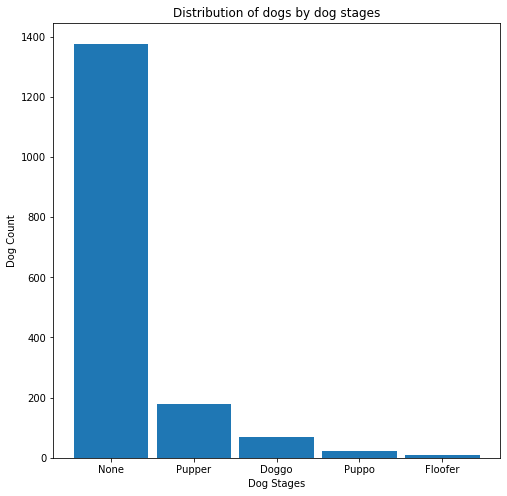

In [559]:
# Making a bar chart
dog_stages = ['None', 'Pupper', 'Doggo', 'Puppo', 'Floofer']
dog_counts = [1377, 180, 69, 22, 9]

fig,ax = plt.subplots(figsize = (8,8))
ax.bar(dog_stages, dog_counts, width = 0.9)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Dog Stages')
plt.title("Distribution of dogs by dog stages")
plt.show()

Pupper is the most popular among defined dog stages. However, the majority of dog stages is not defined, what creates some uncertainties.

### Average rating for each dog stage

In [560]:
# Calculating average rating for each dog stage
ratings_dog_stages = df_master.groupby('dog_stages', as_index=False)['rating_numerator'].mean()

# Sorting by the most popular
ratings_dog_stages.sort_values(by=['rating_numerator'], inplace=True, ascending=False)
ratings_dog_stages

,dog_stages,rating_numerator
4,puppo,12.136364
1,doggo,12.014493
2,floofer,11.888889
0,None,11.417574
3,pupper,11.338889


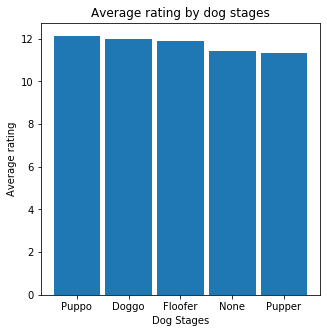

In [561]:
# Building a bar chart
dog_stages = ['Puppo', 'Doggo', 'Floofer', 'None', 'Pupper']
dog_counts = [12.13, 12.01, 11.88, 11.41, 11.33]

fig,ax = plt.subplots(figsize = (5,5))
ax.bar(dog_stages, dog_counts, width = 0.9)
ax.set_ylabel('Average rating')
ax.set_xlabel('Dog Stages')
plt.title("Average rating by dog stages")
plt.show()

It seems that the average rating for each dog stage is around 12. The most popular dog stage by the rating is Puppo. However, None values are presented and it creates some uncertainties.

### Average number of retweets for each dog stage

In [562]:
# Calculating average number of retweets for each dog stage
avg_retweets_dog_stages = df_master.groupby('dog_stages', as_index=False)['retweet_count'].mean()

# Sorting by the most popular
avg_retweets_dog_stages.sort_values(by=['retweet_count'], inplace=True, ascending=False)
avg_retweets_dog_stages

,dog_stages,retweet_count
1,doggo,6272.455882
4,puppo,6217.909091
2,floofer,3673.777778
0,None,2804.983930
3,pupper,2452.388889


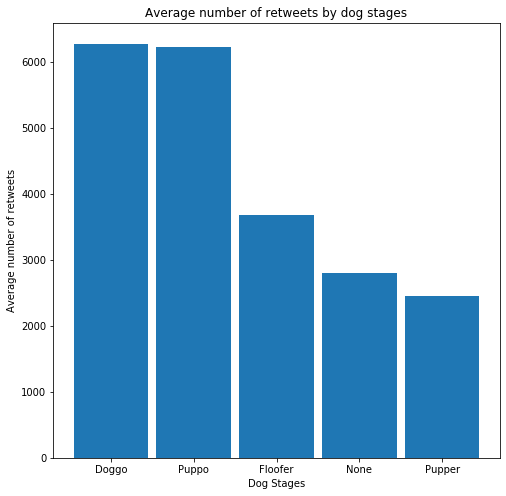

In [563]:
# Building a bar chart
dog_stages = ['Doggo', 'Puppo', 'Floofer', 'None', 'Pupper']
avg_number_retweets = [6272, 6217, 3673, 2804, 2452]

fig,ax = plt.subplots(figsize = (8,8))
ax.bar(dog_stages, avg_number_retweets, width = 0.9)
ax.set_ylabel('Average number of retweets')
ax.set_xlabel('Dog Stages')
plt.title("Average number of retweets by dog stages")
plt.show()

According to the number of retweets, Doggo and Puppo are the most popular among other dog stages.

### Average favorite number by dog stages

In [564]:
# Calculating average number of favorite count for each dog stage
avg_fav_dog_stages = df_master.groupby('dog_stages', as_index=False)['favorite_count'].mean()

# Sorting by the most popular
avg_fav_dog_stages.sort_values(by=['favorite_count'], inplace=True, ascending=False)
avg_fav_dog_stages

,dog_stages,favorite_count
4,puppo,21906.954545
1,doggo,18169.985294
2,floofer,10185.333333
0,None,9614.599708
3,pupper,7528.516667


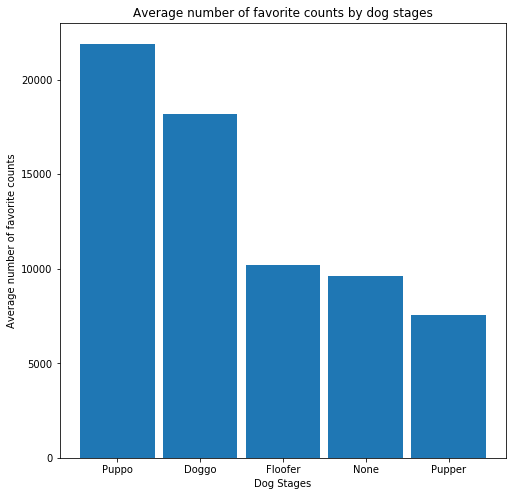

In [565]:
# Building a bar chart
dog_stages = ['Puppo', 'Doggo', 'Floofer', 'None', 'Pupper']
avg_number_fav = [21906, 18169, 10185, 9614, 7528]

fig,ax = plt.subplots(figsize = (8,8))
ax.bar(dog_stages, avg_number_fav, width = 0.9)
ax.set_ylabel('Average number of favorite counts')
ax.set_xlabel('Dog Stages')
plt.title("Average number of favorite counts by dog stages")
plt.show()

Puppo and Doggo are the most favorite dog stages, which have a significant number of favorite counts in comparison with other dog stages.

### Descriptive statistics

In [566]:
# Getting descriptive statistics
df_master[['rating_numerator', 'retweet_count', 'favorite_count', 'prediction_confidence']].describe()

,rating_numerator,retweet_count,favorite_count,prediction_confidence
count,1657.000000,1648.000000,1648.000000,1541.000000
mean,11.445987,2959.853155,9906.978155,0.607935
std,1.120574,4872.908684,13194.035040,0.268953
min,10.000000,11.000000,72.000000,0.055379
25%,10.000000,692.250000,2381.000000,0.371146
50%,11.000000,1597.500000,5275.500000,0.608537
75%,12.000000,3390.250000,12798.250000,0.855552
max,14.000000,78427.000000,157533.000000,1.000000


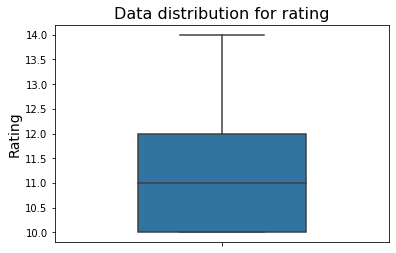

In [567]:
# Building a box plot for rating data (rating_numerator)
bplot = sns.boxplot(y='rating_numerator', data=df_master, width=0.5)
bplot.axes.set_title("Data distribution for rating",fontsize=16)
bplot.set_ylabel("Rating", fontsize=14)
bplot.tick_params(labelsize=10)

As it was explained in the project, dog rating should >= 10, which is correct after data cleaning. Also, it should be noted that the majority of ratings belongs to the interval between 10 to 12.

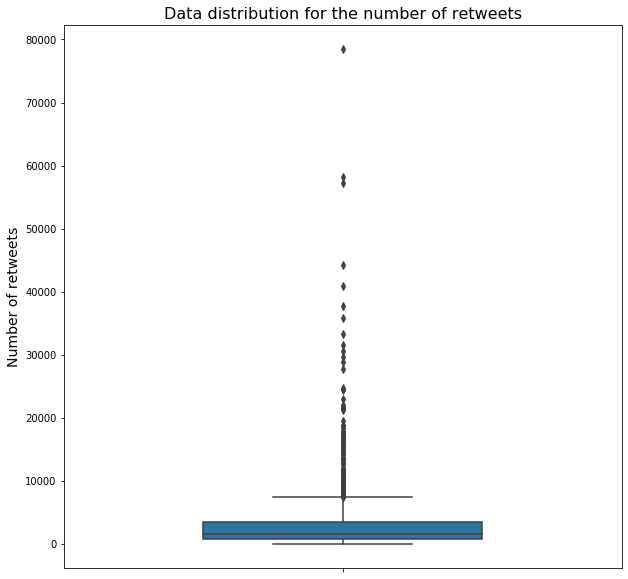

In [568]:
# Building a box plot the number of retweets
plt.figure(figsize=(10, 10))
bplot = sns.boxplot(y='retweet_count', data=df_master, width=0.5)
bplot.axes.set_title("Data distribution for the number of retweets",fontsize=16)
bplot.set_ylabel("Number of retweets", fontsize=14)
bplot.tick_params(labelsize=10)

It's clear that retweets lie in the interval between 0 and less than 10,000. However, there are some number of outliers for tweets, which can be between 10,000 and 80,000.

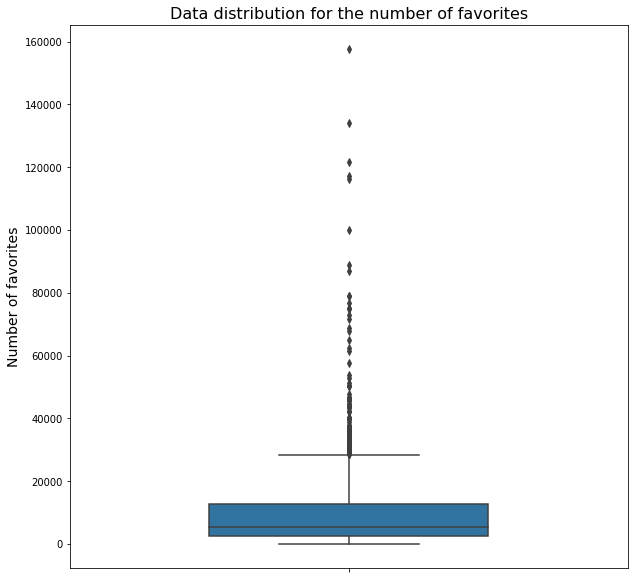

In [571]:
# Building a box plot the number of favorite tweets
plt.figure(figsize=(10, 10))
bplot = sns.boxplot(y='favorite_count', data=df_master, width=0.5)
bplot.axes.set_title("Data distribution for the number of favorites",fontsize=16)
bplot.set_ylabel("Number of favorites", fontsize=14)
bplot.tick_params(labelsize=10)

The number of favorite tweets vary between 0 to 3,000. However, there are some outliers, where the number of favorites lie between >3,000 and 16,000. 

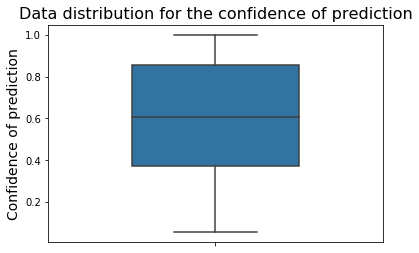

In [570]:
# Building a box plot the prediction_confidence
bplot = sns.boxplot(y='prediction_confidence', data=df_master, width=0.5)
bplot.axes.set_title("Data distribution for the confidence of prediction",fontsize=16)
bplot.set_ylabel("Confidence of prediction", fontsize=14)
bplot.tick_params(labelsize=10)

50% of data for the confidence of prediction of a dog breed belongs to the interval between 0.4 to 0.85, where the mean probability is around 0.6.

<a id='ins'></a>
## Insights

* Pupper is the most popular among defined dog stages. However, the majority of dog stages is not defined, what creates some uncertainties.
* The average rating for each dog stage is around 12. The most popular dog stage by the rating is Puppo. However, None values are presented and it creates some uncertainties.
* According to the number of retweets, Doggo and Puppo are the most popular among other dog stages.
* Puppo and Doggo are the most favorite dog stages, which have a significant number of favorite counts in comparison with other dog stages.
* As it was explained in the project, dog rating should >= 10, which is correct after data cleaning. Also, it should be noted that the majority of ratings belongs to the interval between 10 to 12.
* It's clear that retweets lie in the interval between 0 and less than 10,000. However, there are some number of outliers for tweets, which can be between 10,000 and 80,000.
* The number of favorite tweets vary between 0 to 3,000. However, there are some outliers, where the number of favorites lie between >3,000 and 16,000. 
* 50% of data for the confidence of prediction of a dog breed belongs to the interval between 0.4 to 0.85, where the mean probability is around 0.6.